<a href="https://colab.research.google.com/github/CaillahR/Food-Sale-Predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Predictions 
---
Name: Caillah Reed

Date: 02/16/2023

##Data Dictionary

Variable Name	Description:

- Item_Identifier:	Unique product ID
- Item_Weight:	Weight of product
- Item_Fat_Content:	Whether the product is low fat or regular
- Item_Visibility:	The percentage of total display area of all products in a store allocated to the particular product
- Item_Type:	The category to which the product belongs
- Item_MRP:	Maximum Retail Price (list price) of the product
- Outlet_Identifier:	Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size:	The size of the store in terms of ground area covered
- Outlet_Location_Type:	The type of area in which the store is located
- Outlet_Type:	Whether the outlet is a grocery store or some sort of supermarket
- Item_Outlet_Sales:	Sales of the product in the particular store. This is the target variable to be predicted.

##Import


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
set_config(display='diagram')

##Loading Data


In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/sales_predictions.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Data Cleaning

**How many Rows and Columns?**

In [6]:
rows = len(df)
columns = len(df.columns)
print(f"There are {rows} rows and {columns} columns.")

There are 8523 rows and 12 columns.


-- Or

In [7]:
df.shape

(8523, 12)

**What are the datatypes of each variable?**

In [8]:
print(f"The datatype for rows is {type(rows)} and for columns it's {type(columns)}")

The datatype for rows is <class 'int'> and for columns it's <class 'int'>


-- Or

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Duplicates?**

- No duplicates no worries

In [10]:
df.duplicated().sum()


0

**Missing values?**

In [11]:

df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Dropping Item_Identifier and Outlet_Identifier

- Dropping the Outlet_Identifier because this particular data does not contribute to the sales predicitons, it's irrelevant to the items being sold.

- Then checking for removal of column with df.drop()

In [12]:
df = df.drop(columns= ["Outlet_Identifier", "Item_Identifier"])

In [13]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:

#Sucess!
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Filling Missing Data

- Checking for missing values.
- Then filling data for missing values and confirming change.

In [15]:
print(df.isna().sum())
mean_item_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_item_weight, inplace = True)

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [16]:
df['Item_Fat_Content'].value_counts()
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Summary statistics

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Visuals

In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


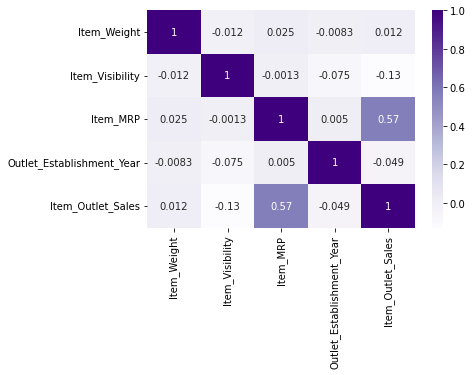

In [20]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True)
plt.show()

- Checking to see which data has a positive or negative correlation.

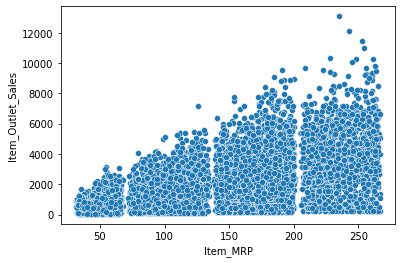

In [21]:
sns.scatterplot(data = df, x = "Item_MRP" , y = "Item_Outlet_Sales")
plt.show()

- This scatterplot shows a positive correlation between Item Outlet Sales and MRP (Highest list price). This means the higher the list price the higher the sale of that item.

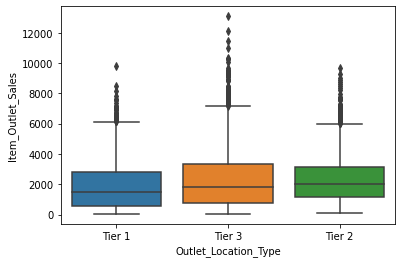

In [22]:
sns.boxplot(data = df, x = "Outlet_Location_Type", y = "Item_Outlet_Sales")
plt.show()

- The average sales are slightly made more at Tier 2 areas than the others. However there are many outliers above the max in all tiers to suggest otherwise.

##Explanatory Visuals

In [23]:
#Checking for styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

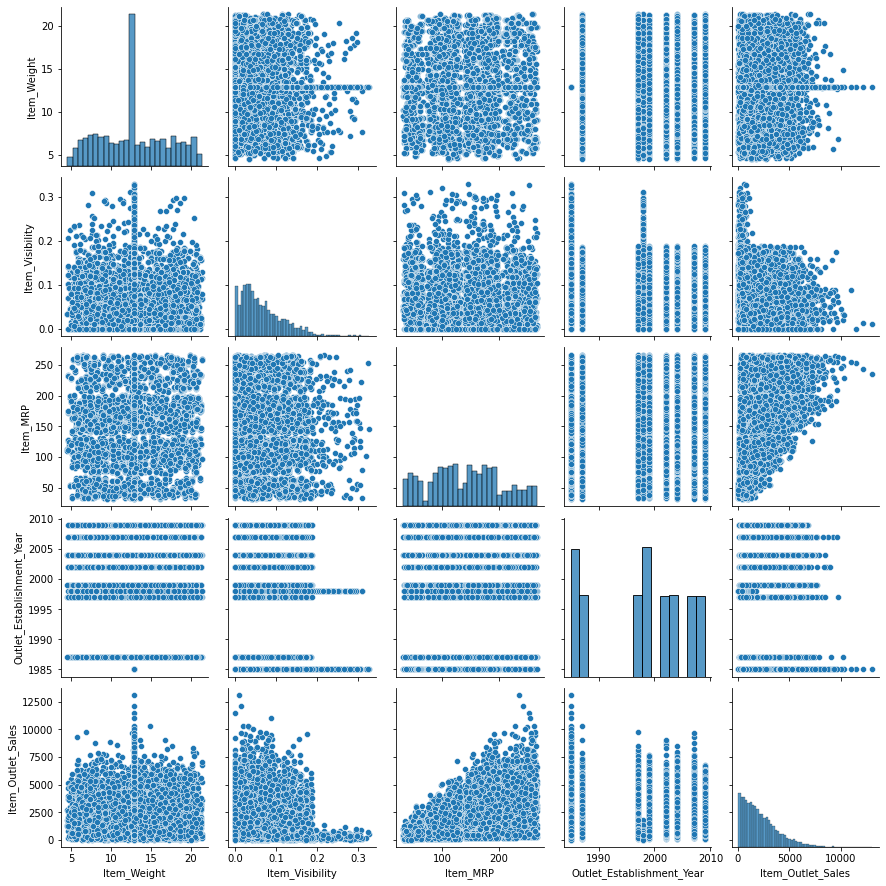

In [24]:
#checking for trends
sns.pairplot(df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


- Where have sales been since the start of the busines and what should be done to keep them at a steady rate?

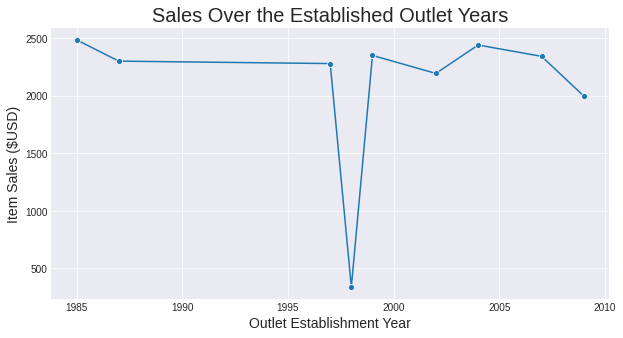

In [26]:
plt.style.use("seaborn-darkgrid")
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df, y ="Item_Outlet_Sales", x = "Outlet_Establishment_Year", ci = None, marker ="o")
plt.xlabel("Outlet Establishment Year", fontsize = 14)
plt.ylabel("Item Sales ($USD)", fontsize = 14)
plt.title("Sales Over the Established Outlet Years", fontsize = 20);
plt.show()

Data shows that sales have been fairly steady since 1985 but took a big dip in sales between 1995-2000. Afterwards data shows that sales shot back up and have been a bit rocky since then. 

Reccomendation : Find out why sales were shot down in between 1995-2000's and what was done differently to bring them back up. Recreate that situation and you may be able to keep sales steady again.

- Will people buy more of a product if it's cheaper?

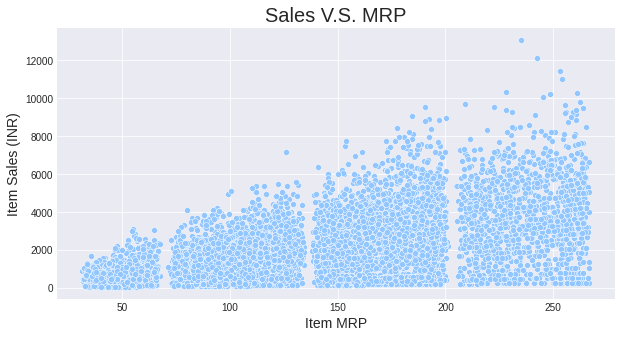

In [27]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data = df, x ="Item_MRP", y = "Item_Outlet_Sales")
plt.title("Sales V.S. MRP", fontsize = 20)
plt.xlabel("Item MRP", fontsize = 14)
plt.ylabel("Item Sales (INR)", fontsize = 14)
plt.show()

The data shows more sales occur when the price of the item is higher.

Reccomendation: Make products that are not selling higher in value, this may spark a change in sales.

## Machine Learning

In [28]:
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  ## Train
  mae = mean_absolute_error(y_train, pipe.predict(x_train))
  mse = mean_squared_error(y_train, pipe.predict(x_train))
  rmse = np.sqrt(mean_squared_error(y_train, pipe.predict(x_train)))
  r2 = r2_score(y_train, pipe.predict(x_train))
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

  ## Test
  mae = mean_absolute_error(y_test, pipe.predict(x_test))
  mse = mean_squared_error(y_test, pipe.predict(x_test))
  rmse = np.sqrt(mean_squared_error(y_test, pipe.predict(x_test)))
  r2 = r2_score(y_test, pipe.predict(x_test))

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')
  


In [29]:
#Define X and y
X = df.drop(columns = ["Item_Outlet_Sales"])

y = df["Item_Outlet_Sales"]

In [30]:
#Train test split the data to prepare for machine learning
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.isna().any()

Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [31]:
#Create a ColumnTransformer to preprocess the data
cat_selector = make_column_selector(dtype_include = "object")
num_selector = make_column_selector(dtype_include ="number")

In [32]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [33]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)



In [34]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [35]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [36]:
# create tuples of (imputer, selector) for each datatype
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# instantiate ColumnTransformer (processor)
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f21d0631c40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f21d0601880>)])

In [37]:
#Transform your data and display the result.
col_transformer.fit(X_train)
X_train_imputed = col_transformer.transform(X_train)
X_test_imputed = col_transformer.transform(X_test)
# change the result back to a dataframe to find any missing data
#X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
#X_train_imputed.isna().any()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


###Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [39]:
from sklearn.pipeline import make_pipeline
reg_pipe = make_pipeline(scaler, reg)

In [52]:
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  ## Train
  rmse = np.sqrt(mean_squared_error(y_train, pipe.predict(x_train)))
  r2 = r2_score(y_train, pipe.predict(x_train))
  print(f'{model_name} Train Scores')
  print(f'RMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

  ## Test
  rmse = np.sqrt(mean_squared_error(y_test, pipe.predict(x_test)))
  r2 = r2_score(y_test, pipe.predict(x_test))

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'RMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [40]:
#fit on imputed data (other data has null possibly)
reg_pipe.fit(X_train_imputed,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [41]:
pred_test = reg_pipe.predict(X_test_imputed)
pred_train = reg_pipe.predict(X_train_imputed)

In [58]:
model_metrics(reg_pipe, X_train_imputed, y_train, X_test_imputed, y_test, model_name='Decision Regression')

Decision Regression Train Scores
RMSE: 1,139.5737 
R2: 0.5612

Decision Regression Test Scores
RMSE: 1,092.9518 
R2: 0.5670



###Regression Tree

In [44]:
dec_tree = DecisionTreeRegressor(random_state = 42)

dec_tree.fit(X_train_imputed, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
train_preds = dec_tree.predict(X_train_imputed)
test_preds = dec_tree.predict(X_test_imputed)

In [46]:
# evaluating the model
train_score = dec_tree.score(X_train_imputed, y_train)
test_score = dec_tree.score(X_test_imputed, y_test)
print(train_score)
print(test_score)


1.0
0.18054765703238174


There seems to be an issue of overfitting in the decision tree. The R2 score in the training is higher than the testing data.

In [47]:
print(dec_tree.get_depth())

print(dec_tree.get_n_leaves())


40
6265


In [48]:
depths = list(range(2, 40)) # will try every value between 2 and 40

scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_imputed, y_train)
    train_score = dec_tree.score(X_train_imputed, y_train)
    test_score = dec_tree.score(X_test_imputed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score


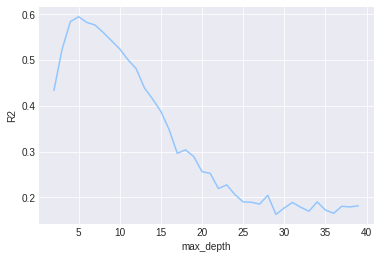

In [49]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');


In [50]:
#Looking at wich depth precisely has the highest r2 test score
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()


,Test Score,Train Score
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582356,0.615072
7,0.576592,0.626454
8,0.560262,0.642714


In [51]:
#Using index with highest test score
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_imputed, y_train)
train_5_score = dec_tree_5.score(X_train_imputed, y_train)
test_5_score = dec_tree_5.score(X_test_imputed, y_test)
print(train_5_score)
print(test_5_score)
#Happy balance~

0.6039397477322956
0.5947099753159972


In [55]:
#R2 and RMSE Score for regression tree
model_metrics(dec_tree_5, X_train_imputed, y_train, X_test_imputed, y_test, model_name='Decision Regression')

Decision Regression Train Scores
RMSE: 1,082.6462 
R2: 0.6039

Decision Regression Test Scores
RMSE: 1,057.4431 
R2: 0.5947



The data fits better on the regression tree than the linear model and there are less penalized errors on the regression tree.

### Recommendation

I recommend using the decision regression tree. The regression tree will be the best model to use due to the better fit and fewer errors.